In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('/content/diabetes.csv')

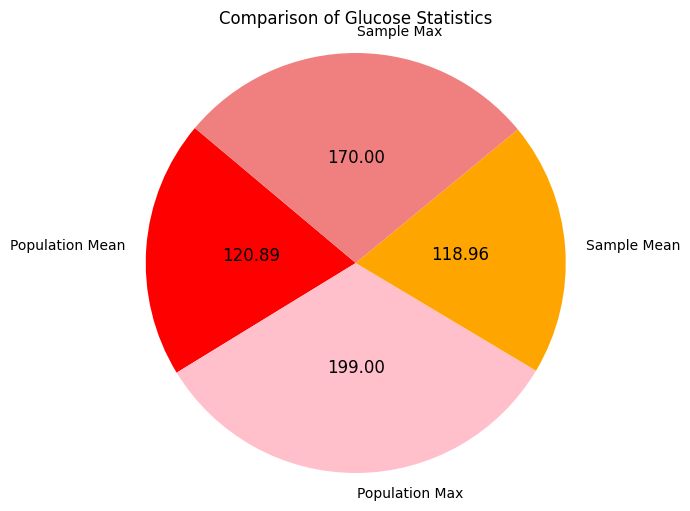

In [ ]:
np.random.seed(768)
sample = data.sample(25)


population_mean_glucose = data['Glucose'].mean()
population_max_glucose = data['Glucose'].max()
sample_mean_glucose = sample['Glucose'].mean()
sample_max_glucose = sample['Glucose'].max()

import numpy as np

# Data
name_label = ['Population Mean', 'Population Max', 'Sample Mean', 'Sample Max']
values = [population_mean_glucose, population_max_glucose, sample_mean_glucose, sample_max_glucose]
colors = ['red', 'pink', 'orange', 'lightcoral']

# Creating a pie chart
plt.figure(figsize=(8, 6))
patches, texts = plt.pie(values, labels=name_label, colors=colors, startangle=140)
plt.title('Comparison of Glucose Statistics')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adding actual values as annotations
for i, p in enumerate(patches):
    # Find the mid-angle for each slice
    angle = (p.theta1 + p.theta2) / 2.
    # Convert angle to radians
    angle_rad = angle * (np.pi / 180)
    # Calculate coordinates for annotation
    x = 0.5 * np.cos(angle_rad)
    y = 0.5 * np.sin(angle_rad)
    # Place the annotation
    plt.text(x, y, f'{values[i]:.2f}', ha='center', va='center', fontsize=12, color='black')

plt.show()

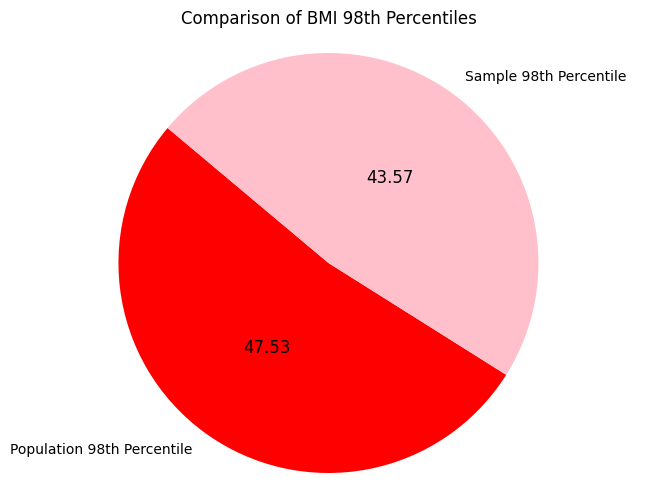

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

population_percent = np.percentile(data['BMI'], 98)
sample_percent = np.percentile(sample['BMI'], 98)

# Data
name_label = ['Population 98th Percentile', 'Sample 98th Percentile']
values = [population_percent, sample_percent]
colors = ['red', 'pink']

# Creating a pie chart
plt.figure(figsize=(8, 6))
patches, texts = plt.pie(values, labels=name_label, colors=colors, startangle=140)
plt.title('Comparison of BMI 98th Percentiles')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adding actual values as annotations
for i, p in enumerate(patches):
    # Find the mid-angle for each slice
    angle = (p.theta1 + p.theta2) / 2.
    # Convert angle to radians
    angle_rad = angle * (np.pi / 180)
    # Calculate coordinates for annotation
    x = 0.5 * np.cos(angle_rad)
    y = 0.5 * np.sin(angle_rad)
    # Place the annotation
    plt.text(x, y, f'{values[i]:.2f}', ha='center', va='center', fontsize=12, color='black')

plt.show()

In [ ]:
bootstrap_samples = 500
sample_size = 150

bootstrap_means = np.zeros(bootstrap_samples)
bootstrap_std_devs = np.zeros(bootstrap_samples)
bootstrap_percentiles = np.zeros(bootstrap_samples)

for i in range(bootstrap_samples):
    bootstrap_sample = data['BloodPressure'].sample(sample_size, replace=True)
    bootstrap_means[i] = bootstrap_sample.mean()
    bootstrap_std_devs[i] = bootstrap_sample.std()
    bootstrap_percentiles[i] = np.percentile(bootstrap_sample, 98)

population_mean = data['BloodPressure'].mean()
population_std_dev = data['BloodPressure'].std()
population_percentile = np.percentile(data['BloodPressure'], 98)

bmean=np.mean(bootstrap_means)
bsd=np.mean(bootstrap_std_devs)
bp=np.mean(bootstrap_percentiles)

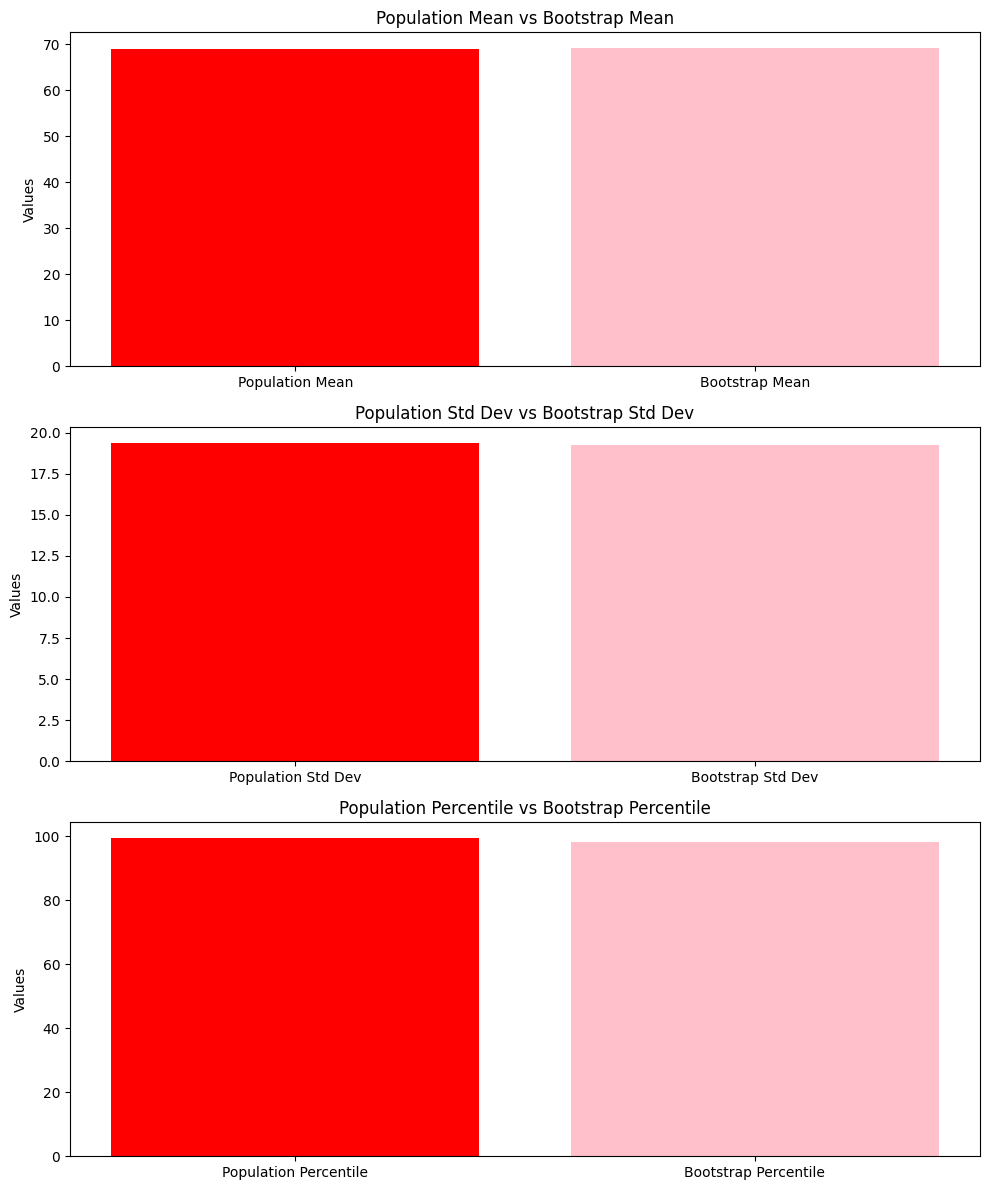

In [41]:
fig, axs = plt.subplots(3, 1, figsize=(10, 12))


axs[0].bar(['Population Mean', 'Bootstrap Mean'], [population_mean, bmean], color=['red', 'pink'])
axs[0].set_ylabel('Values')
axs[0].set_title('Population Mean vs Bootstrap Mean')


axs[1].bar(['Population Std Dev', 'Bootstrap Std Dev'], [population_std_dev, bsd], color=['red', 'pink'])
axs[1].set_ylabel('Values')
axs[1].set_title('Population Std Dev vs Bootstrap Std Dev')


axs[2].bar(['Population Percentile', 'Bootstrap Percentile'], [population_percentile, bp], color=['red', 'pink'])
axs[2].set_ylabel('Values')
axs[2].set_title('Population Percentile vs Bootstrap Percentile')

plt.tight_layout()
plt.show()